# NumPy Cheatsheet

In [61]:
import numpy as np

## The Basics of NumPy Arrays 
Remember that unlike Python lists, NumPy is constrained to arrays that all contain the same type. If the types do not match, NumPy will upcast if possible. If we want to explicitly set the data type of the resulting array, we can use the dtype keyword. 

Basic array manipulation: 
- **atributes of arrays** - determining the size, shape, memory consumption, and data types of arrays
    - `.T`: the transposed array
    - `.dtype`: data type of the array's elements.
    - `.flat`: 1-D iterator over the array.
        ```python
        [In] arr1 = np.array(([1,3,4,5,6,7],[1,3,4,5,6,7]))
        [In] arr1.flat[:]
        [Out] array([1, 3, 4, 5, 6, 7, 1, 3, 4, 5, 6, 7])
        ```
    - `.size`: the number of elements in the array.
    - `.ndim`: the number of array dimensions.
    - `.shape`: tuple of array dimensions.
- **methods of arrays**
    - `.argmax()`: returns indices of the maximum values along the given axis.
    - `.argmin()`: returns indices of the minimum values alog the given axis
    - `.argsort()`: returns the indices that would sort the array.
    - `.astype()`: copy of the array, cast to a specified type.
    - `.copy()`: return a copy of the array.
    - `.cumprod()`: return the cummulative product of the element along the given axis.
    - `.cumsum()`: return the cummulative sum of the elements along the given axis.
    - `.dot()`: dot product of two arrays. 
    - `.dumps()`: return the pickle of the array as a string. 
    - `.flatten()`: return a copy of the array colapsed into one direction. 
    - `.percentile()`:
    - `.max()`: return the maximum along a given axis. 
    - `.min()`: return the minimum along a given axis.
    - `.mean()`: return the average of the array elements along a given axis.
    - `.std()`: return the standard deviation of the array elements along given axis.
    - `.var()`: returns the variance of the array elements, along given axis. 
    - `.prod()`: return the product of the array elements over the given axis. 
    - `.sum()`: return the sum of the array elements over the given axis. 
    - `.ptp()`: (maximum - minimum) value along a given axis.
    - `.reshape()`: return an array containing the same data with a new shape. 
    - `.round()`: return the array with each element rounded to the given number of decimals. 
    - `.sort()`: sort an array in-place.
    - `.transpose()`: returns a view of the array with axes transposed. 
- **indexing of arrays** - getting and setting the value of individual array elements
    - in a one dimensional array, you can access the ith value (counting from zero) by specifying the desired index in square brackets, just as with Python lists
    - to index from the end of the array you can use negative indices
    - in a multidimensional array, you can access items using a comma-seperated tuple of indices
- **slicing of arrays** - getting and setting smaller subarrays within a larger array
    - Just as we can use square brackets to access individual array elements, we can also use them to access subarrays with the slice notation, marked by the colon `:` character. 
    - `x[start:stop:step]`
        - if any of these are unspecified, they default to the values start=0, stop = size of dimension, step = 1
        - a potentially confusing case is when the step value is negative
    - multidimensional slices work in the same way, with multiple slices seperated by commas
    - to access a single row or column of an array you can combine indexing and slicing using an empty slice marked by a `:`
    - one important thing to know about array slices is that they return views rather than copies of the array data. 
        - this default behavior is actually quite useful: it means that when we work with large datasets, we can access and process pieces of these datasets without the need to copy the underlying data buffer
            - this is one area in which NumPy array slicing differs from Python list slicing: in lists slices will be copies 
- **reshaping of arrays** - changing the shape of a given array
    - `.reshape()`: return an array containing the same data with a new shape.
- **joining and splitting of arrays** - combining multiple arrays into one, and splitting one array into many
    - Concatenation
        - `np.concatenate((a1,a2,..an),axis)`: join a sequence of arrays along an existing axis. 
        - `np.stack(arrays,axis=0)`: join a sequence of arrays along a new axis.
        - `np.vstack(tup)`: stack arrays in sequence vertically (row wise). 
        - `np.hstack(tup)`: stack arrays in sequence horizontally (column wise). 
        - `np.dstack(tup)`: stack arrays in sequence depth wise (along third axis).
    - Splitting
       - `np.split(array,indices_or_sections,axis)`: split an array into multiple sub-arrays as views into the original array.
       - `np.hsplit(array,indices_or_sections)`: split an array into multiple sub-arrays horizontally (column-wise)
       - `np.vsplit(array,indices_or_sections)`: split an array into multiple sub-arrays vertically (row-wise)
       - `np.dsplit`: split array into multiple sub-arrays along the 3rd axis (depth). 

## Computation on NumPy Arrays
The key to making computations with arrays fast is to use *vectorized* operations which are implemented through NumPy's *universal functions*. Computations using vectorization through ufuncs are nearly always more efficient than their counterpart implemented through Python loops. 

**Arithmetic operations** (some of them)
- `np.add` - additon
- `np.subtract` - subtract
- `np.negative` - unary negation
- `np.multiply` - multiply
- `np.divide` - division
- `np.floor_divide` - floor division
- `np.power` - exponentiation
- `np.mod` - modulus/remainder
- `np.abs` - absolute value
- `np.exp`
- `np.exp2`
- `np.power`
- `np.log`

**Aggregates**
- `np.ufunc.reduce()` - reduce the array's dimension by one, by applying ufunc along one axis. 
- `np.ufunc.accumulate()` - accumulate the result of applying the operator to all elements. 

Note: most aggregates have `NaN` safe counterparts that compute the result while ignoring missing values. 

**Broadcasting**
Broadcasting is a set of rules for applying binary ufuncs (e.g., addition, subtraction, multiplication, etc.) on arrays of different sizes. 

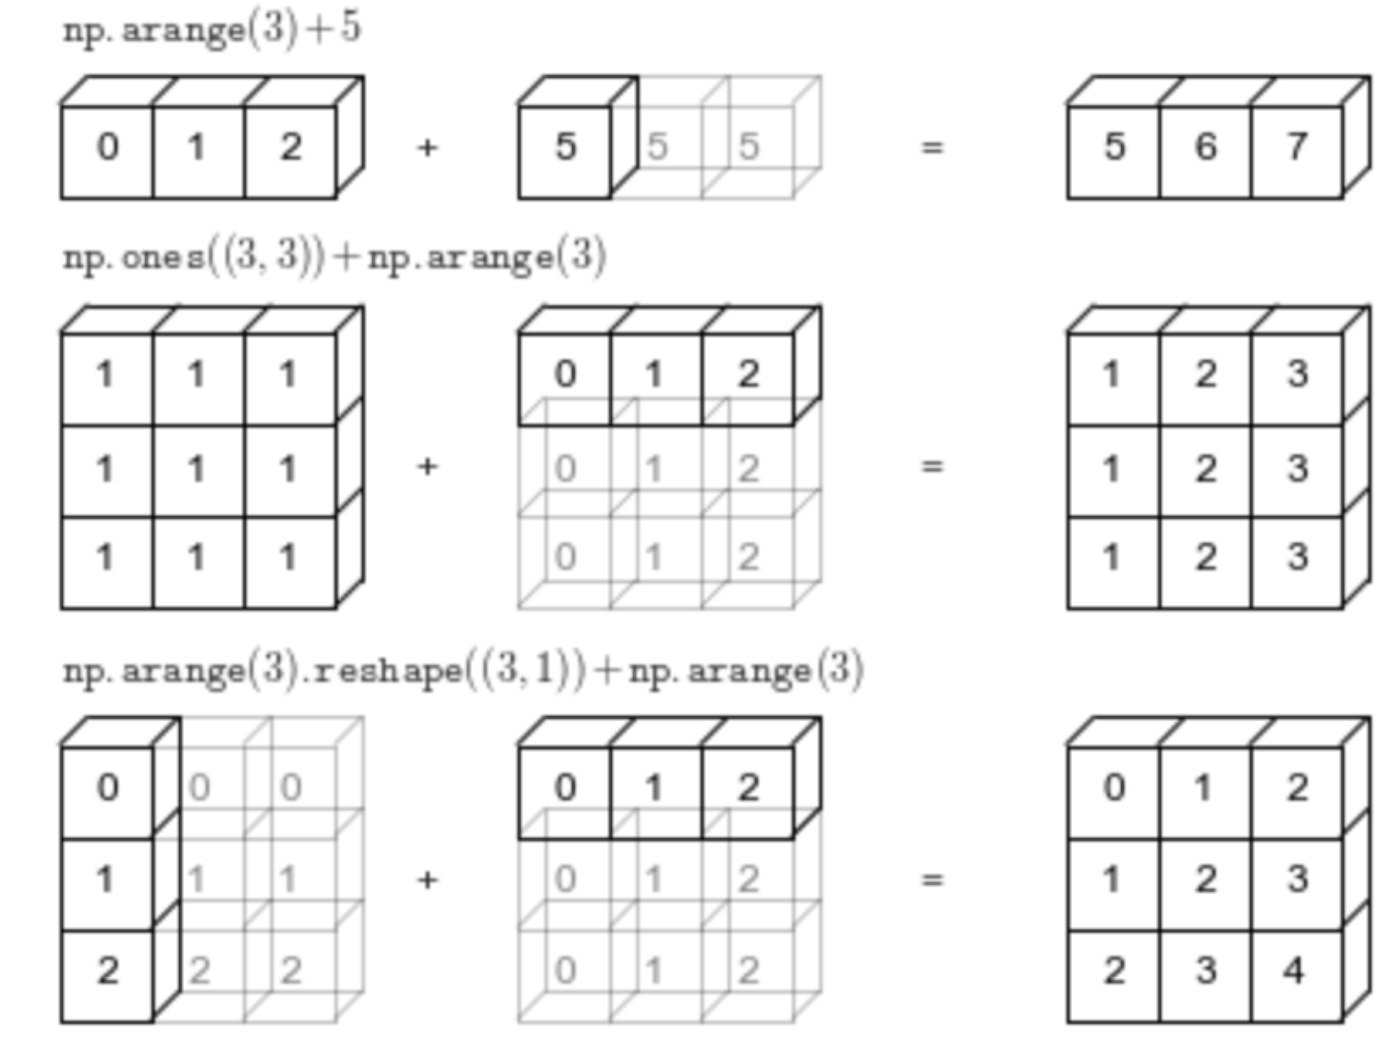
In this image, the light boxes represent the broadcasted values. 
- Rules of broadcasting
    - Rule 1: if the two arrays differ in their number of dimensions, the shape of the one with fewer dimensions is *padded* with valyes on its leading side. 
    - Rule 2: if the shape of the two arrays does not match in any dimension, the array with shape equal to 1 in that dimension is stretched to match the other shape. 
    - Rule 3: if the shape of the two arrays does not match in any dimension and neither is equal to 1, an error is raised. 
    
## Comparisons, Masks, and Boolean Logic
- **Comparisons**: NumPy implements comparison operators as element wise ufuncs. The result of these comparison operators is always an array with a Boolean data type. 
    - Standard comparison operators:
        - `<`
        - `>`
        - `<=`
        - `>=`
        - `!=`
        - `==`

In [58]:
# comparison Operations
x = np.array([1, 2, 3, 4, 5])
print(x<3)

print('\n')
# also works on arrays of any size and shape
rng = np.random.RandomState(0)
x = rng.randint(10, size=(3, 4))
print(x<5)

[ True  True False False False]


[[False  True  True  True]
 [False False  True False]
 [ True  True False False]]


In [71]:
import pandas as pd
rainfall = pd.read_csv('/Users/sarahamiraslani/Learning/data/Seattle2014.csv')['PRCP'].values
inches = rainfall/254.0

In [72]:
print("Number days without rain:      ", np.sum(inches == 0))
print("Number days with rain:         ", np.sum(inches != 0))
print("Days with more than 0.5 inches:", np.sum(inches > 0.5))
print("Rainy days with < 0.2 inches  :", np.sum((inches > 0) &
                                                (inches < 0.2)))

Number days without rain:       215
Number days with rain:          150
Days with more than 0.5 inches: 37
Rainy days with < 0.2 inches  : 75


- **Masking**: comes up when you want to extract, modify, count, or otherwise manipulate values in an array based on some criterion. 

- **Working with Boolean Arrays**: given a Boolean array, there are many useful operations you can do. 
    - Counting the number of `True`/`False` entries in a Boolean array. 
        - `np.count_nonzero` is useful for this
        - `np.sum` also gets at this information because `False` is interpreted as `0` and `True` is interpreted as `1`. 
            - the benefit of this synatx is that summation can be done along rows/columns as well.

In [83]:
# working with Boolean Arrays
print(x)

print('\n')
# create boolean array in response to x<6
print(x<6)

print('\n')
# counting entries: how many values are less than 6? 
print(np.count_nonzero(x<6))

print('\n')
# create a new array, y , with where x<6
# this is a masking operation
y = x[x<6]
print(y)

[[5 0 3 3]
 [7 9 3 5]
 [2 4 7 6]]


[[ True  True  True  True]
 [False False  True  True]
 [ True  True False False]]


8


[5 0 3 3 3 5 2 4]


Note: using the keywords `and`/`or` versus the operators `&`/`|`
- `and`/`or` gauge the truth or falsehood of the entire object; equivalent to asking Python to treat the object as a single Boolean entity
- `&`/`|` refer to bits within each object

In [88]:
A = np.array([True,False,True,False,True,False],dtype=bool)
B = np.array([True,True,True,False,True,True],dtype=bool)

try: 
    # returns an error
    # or will try to evaluate the truth or falsehood of the entire 
    # array object, which is not a well-defined value
    A or B
except: 
    print('ValueError')
    
A | B

ValueError


array([ True,  True,  True, False,  True,  True])

## Indexing
- **Simple Indexing**: `ndarrays` can be indexed using the standard Python array[selection] syntax.  
- **Boolean indexing/masks** occurs when the indexing object is an array object of Boolean type
- **Fancy Indexing** is like simple indexing, but we pass arrays of indices instead of simple scalars. 
    - Fancy inndexing can also be used to modify parts of an array. 

Reminder: in Python, all indices are zero-based. Negative indices are interpreted as counting from the end of the array. 

In [91]:
# Boolean Indexing
x = np.array([1, 2, 3, 4, 5])
new_arr = x[x<5]
print(new_arr)

[1 2 3 4]


In [97]:
import numpy as np
rand = np.random.RandomState(42)

x = rand.randint(100,size=10)
print(x)

# Fancy Indexing
ind = np.array([[3,7],
                [4,5]])

print(ind)
x[ind]

[51 92 14 71 60 20 82 86 74 74]
[[3 7]
 [4 5]]


array([[71, 86],
       [60, 20]])

## Slicing
- Basic slicing: array[start:stop:step]
    - you can use slicing to change values in the array, but (unlike lists) you can never grow the array. 
    - Note: all arrays generated by basic slicing are always views (not copies) of the original array. If you would like to extract a copy, an explicit `copy()` is recommended. 

**A note on `np.newaxis`** 
- `np.newaxis` is used to increase the dimension of the existing array by one more dimension, when used once. 
    - 1D array --> 2D array, 2D array --> 3D array...
- When is this useful? 
    1. When you want to *explicitly* convert a 1D array to either a row vector or a column vector. 
    2. When you want to make use of numpy broadcasting
    3. When you want to use use `np.newaxis` more than once to *promote* the array to higher dimensions. 

In [104]:
# SCENERIO 1
# 1D array
arr = np.arange(4)
print(arr)

# make arr a row vector by inserting an axis along the first dimension
row_vec = arr[np.newaxis, :]
print(row_vec)

# make it a column vector by inserting an axis along the second dimension
col_vec = arr[:, np.newaxis] 
print(col_vec)

[0 1 2 3]
[[0 1 2 3]]
[[0]
 [1]
 [2]
 [3]]


In [116]:
# SCENERIO 2

# imagine that we want to add these arrays
x1 = np.array([1, 2, 3, 4, 5])
x2 = np.array([5, 4, 3])

# returns an error because shapes don't match
try: 
    x1 + x2 
except: 
    print('ValueError: operands could not be broadcast together')

# you can use np.newaxis to increase the dimension of one of the arrays so that NumPy can 
# broadcast
x1_new = x1[:,np.newaxis]
print('\n',x1_new)

# add
print('\n',x1_new + x2)

# alternatively, you could add new axis to array x2
x2_new = x2[:,np.newaxis]
print('\n',x2_new)

# add 
print('\n',x1 + x2_new)

ValueError: operands could not be broadcast together

 [[1]
 [2]
 [3]
 [4]
 [5]]

 [[ 6  5  4]
 [ 7  6  5]
 [ 8  7  6]
 [ 9  8  7]
 [10  9  8]]

 [[5]
 [4]
 [3]]

 [[ 6  7  8  9 10]
 [ 5  6  7  8  9]
 [ 4  5  6  7  8]]


In [125]:
# SCENERIO 3
arr = np.arange(25).reshape(5,5)
print(arr)
print('\n',arr.shape)

# promoting a 2D array to a 5D array
arr_5D = arr[np.newaxis,np.newaxis,np.newaxis,np.newaxis,np.newaxis]

print('\n',arr_5D)
print('\n',arr_5D.shape)

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]]

 (5, 5)

 [[[[[[[ 0  1  2  3  4]
      [ 5  6  7  8  9]
      [10 11 12 13 14]
      [15 16 17 18 19]
      [20 21 22 23 24]]]]]]]

 (1, 1, 1, 1, 1, 5, 5)
